# Importation : 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# chargement des donnees et apercu :

In [ ]:
# Chargement des données
df = pd.read_csv("bank-full.csv", sep=';')

# Aperçu des premières lignes
print(df.head())

# Statistiques descriptives
print(df.describe())


                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

# info concernant la base de donnees : 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Pretraitement :

In [23]:

# Encodage des variables catégorielles (One hot encoding )
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)

# Conversion de la cible 'y'
df_encoded['y'] = df['y'].map({'yes': 1, 'no': 0})

# Séparation des features et de la cible
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Standardisation (utile pour KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split :

In [24]:


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Training :

In [25]:


# Modèles de base
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Entraînement
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} entraîné.")


KNN entraîné.
Decision Tree entraîné.
Random Forest entraîné.


# Optimisation du Random Forest :

In [26]:


# Exemple pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


# Evaluation :

In [ ]:


def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Évaluation
for name, model in models.items():
    evaluate_model(name, model)

# Évaluation du modèle optimisé
evaluate_model("Random Forest (Optimisé)", best_rf)



--- KNN ---
Accuracy: 0.8933982085591065
Precision: 0.5842293906810035
Recall: 0.30812854442344045
F1 Score: 0.4034653465346535
Confusion Matrix:
 [[7753  232]
 [ 732  326]]

--- Decision Tree ---
Accuracy: 0.877031958420878
Precision: 0.4756756756756757
Recall: 0.499054820415879
F1 Score: 0.4870848708487085
Confusion Matrix:
 [[7403  582]
 [ 530  528]]

--- Random Forest ---
Accuracy: 0.9051199823067566
Precision: 0.6607717041800643
Recall: 0.388468809073724
F1 Score: 0.48928571428571427
Confusion Matrix:
 [[7774  211]
 [ 647  411]]

--- Random Forest (Optimisé) ---
Accuracy: 0.9051199823067566
Precision: 0.6607717041800643
Recall: 0.388468809073724
F1 Score: 0.48928571428571427
Confusion Matrix:
 [[7774  211]
 [ 647  411]]


# Comparaison entre les models:

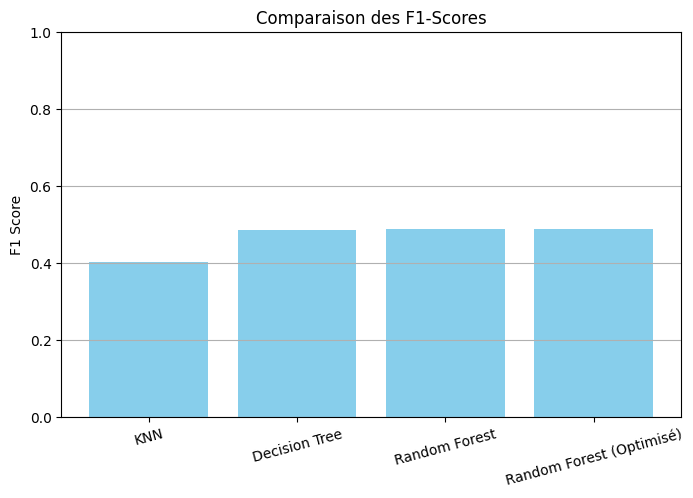


✅ Meilleur modèle recommandé : Random Forest


In [28]:


# Collecte des scores
scores = {
    "KNN": f1_score(y_test, models["KNN"].predict(X_test)),
    "Decision Tree": f1_score(y_test, models["Decision Tree"].predict(X_test)),
    "Random Forest": f1_score(y_test, models["Random Forest"].predict(X_test)),
    "Random Forest (Optimisé)": f1_score(y_test, best_rf.predict(X_test))
}

# Graphique comparatif
plt.figure(figsize=(8,5))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.title("Comparaison des F1-Scores")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

# Meilleur modèle
best_model = max(scores, key=scores.get)
print(f"\n✅ Meilleur modèle recommandé : {best_model}")
